In [1]:
cd ~/Desktop/floating_Solar/

/Users/rspencer/Desktop/floating_Solar


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("Current_Projects_Characterization.csv", encoding = "ISO-8859-1")

In [5]:
data.head()

,name,capacity_kw,location,year,usa,mounting_type,water_surf_area_acres,sys_surf_area_acres,coverage,depth_ft,water_use,latitude,longitude
0,Kyocera TCL Solar,2300.0,"Hyogo Prefecture, Western Japan",2015,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kyocera TCL Solar,1700.0,"Hyogo Prefecture, Western Japan",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kyocera TCL Solar,1200.0,"Higashira Pond, Japan",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Infratech Industries,4000.0,"Jamestown, South Australia",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kyocera TCL Solar,13400.0,"Yamakura Dam, Japan",2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


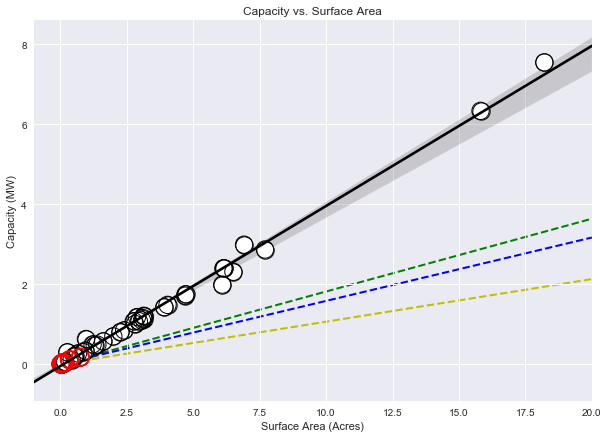

In [7]:
f, ax = plt.subplots(figsize=(10, 7))
# ax.set(xscale="log", yscale="log")
plt.xlim([-1,20])

sns.regplot(data.sys_surf_area_acres, data.capacity_kw/1000, color='k')
plt.xlabel("Surface Area (Acres)"); plt.ylabel("Capacity (MW)")
plt.plot([0,20],[0,3.64], 'g--', linewidth=2, zorder = 0) # Fixed
plt.plot([0,20],[0,3.17], 'b--', linewidth=2, zorder = 0) # 1-Axis
plt.plot([0,20],[0,2.13], 'y--', linewidth=2, zorder = 0) # 2-Axis
plt.scatter(data.sys_surf_area_acres, data.capacity_kw/1000, s=300, zorder = 1, color='w', edgecolor='k', linewidth='1')
plt.scatter(data.sys_surf_area_acres, data.capacity_kw/1000, s=300, zorder = 1, facecolors='none', edgecolor='k', linewidth='1')
plt.scatter(data[data.usa == True].sys_surf_area_acres, data[data.usa == True].capacity_kw/1000, s=300, zorder = 2, facecolors='none', edgecolor='r', linewidth='2')

plt.title("Capacity vs. Surface Area")
plt.savefig("Acres_MW.png", dni=5000)
plt.show()

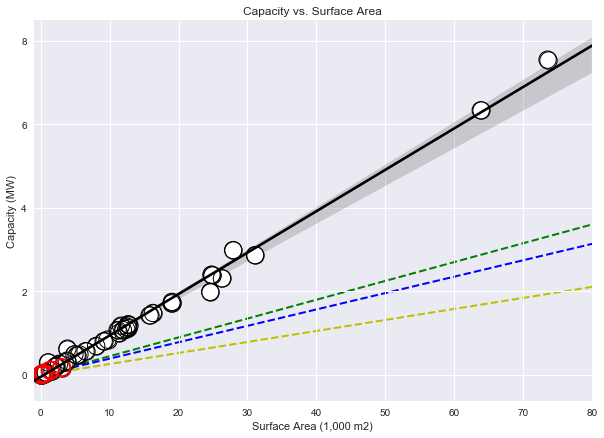

In [14]:
f, ax = plt.subplots(figsize=(10, 7))
# ax.set(xscale="log", yscale="log")
plt.xlim([-1,80])

sns.regplot(data.sys_surf_area_acres*4.04, data.capacity_kw/1000, color='k')
plt.xlabel("Surface Area (1,000 m2)"); plt.ylabel("Capacity (MW)")
plt.plot(np.array([0,20])*4.04,[0,3.64], 'g--', linewidth=2, zorder = 0) # Fixed
plt.plot(np.array([0,20])*4.04,[0,3.17], 'b--', linewidth=2, zorder = 0) # 1-Axis
plt.plot(np.array([0,20])*4.04,[0,2.13], 'y--', linewidth=2, zorder = 0) # 2-Axis
plt.scatter(data.sys_surf_area_acres*4.04, data.capacity_kw/1000, s=300, zorder = 1, color='w', edgecolor='k', linewidth='1')
plt.scatter(data.sys_surf_area_acres*4.04, data.capacity_kw/1000, s=300, zorder = 1, facecolors='none', edgecolor='k', linewidth='1')
plt.scatter(data[data.usa == True].sys_surf_area_acres*4.04, data[data.usa == True].capacity_kw/1000, s=300, zorder = 2, facecolors='none', edgecolor='r', linewidth='2')

plt.title("Capacity vs. Surface Area")
plt.savefig("Acres_MW.png", dni=5000)
plt.show()

In [31]:
data_regr = data[~np.isnan(data.sys_surf_area_acres)]
polyfit = np.polyfit(np.array(data_regr.sys_surf_area_acres), np.array(data_regr.capacity_kw/1000), 1)
Acres_MW = 1 / np.polyfit(np.array(data_regr.sys_surf_area_acres), np.array(data_regr.capacity_kw/1000), 1)[0]
print ("Acres per MW:", Acres_MW)
print ("R2:", r2_score(data_regr.capacity_kw/1000, (data_regr.sys_surf_area_acres)*polyfit[0]+polyfit[1]))

Acres per MW: 2.49757175269
R2: 0.9935830631


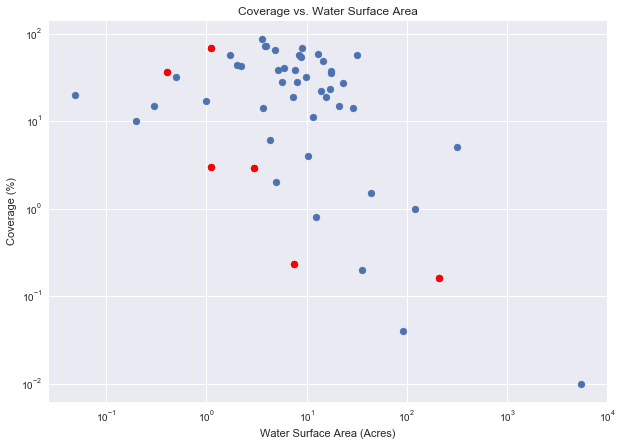

In [44]:
f, ax = plt.subplots(figsize=(10, 7))
ax.set(xscale="log", yscale="log")
plt.xlabel("Water Surface Area (Acres)"); plt.ylabel("Coverage (%)")
plt.scatter(data.water_surf_area_acres, data.coverage)
plt.scatter(data[data.usa == True].water_surf_area_acres, data[data.usa == True].coverage, color='r')
plt.title("Coverage vs. Water Surface Area")
plt.show()

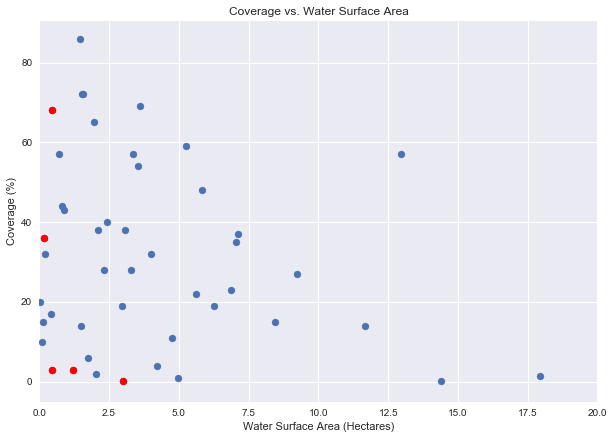

In [50]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xlim([0,20])
plt.xlabel("Water Surface Area (Hectares)"); plt.ylabel("Coverage (%)")
plt.scatter(data.water_surf_area_acres*0.404686, data.coverage)
plt.scatter(data[data.usa == True].water_surf_area_acres*0.404686, data[data.usa == True].coverage, color='r')
plt.title("Coverage vs. Water Surface Area")
plt.show()

In [75]:
data.coverage.max()

86.0

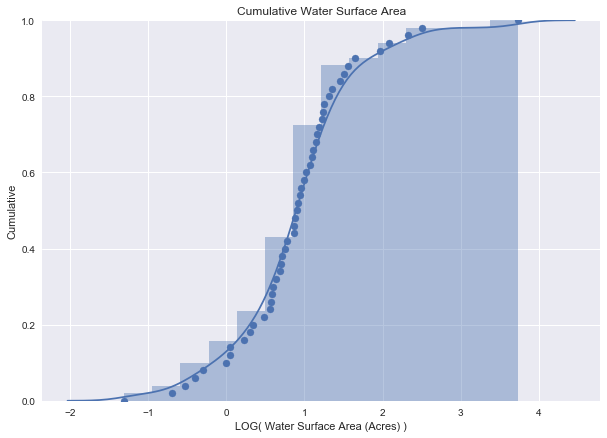

In [28]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
x = np.log10(data[~np.isnan(data.water_surf_area_acres)].water_surf_area_acres)
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.scatter(x2, y)
plt.xlabel("LOG( Water Surface Area (Acres) )"); plt.ylabel("Cumulative")
plt.title("Cumulative Water Surface Area")
plt.show()

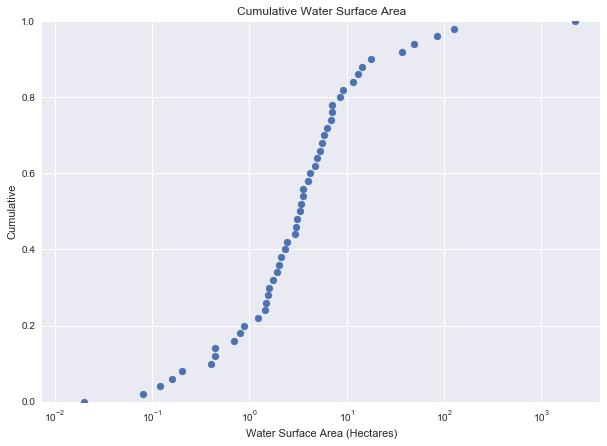

In [38]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
x = (data[~np.isnan(data.water_surf_area_acres)].water_surf_area_acres*0.404686)
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]
plt.scatter(x2, y)
plt.xscale('log')
plt.xlabel("Water Surface Area (Hectares)"); plt.ylabel("Cumulative")
plt.title("Cumulative Water Surface Area")
plt.show()

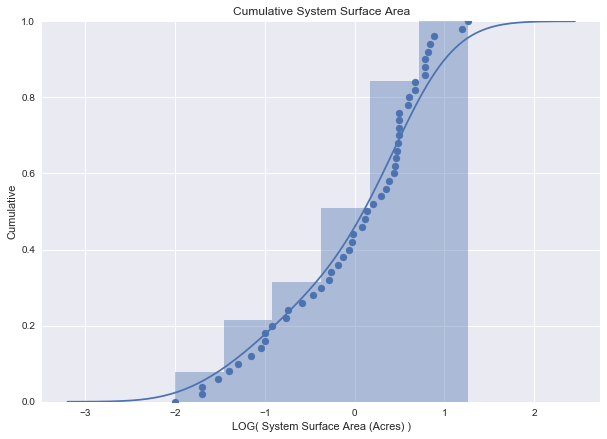

In [65]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
x = np.log10(data[~np.isnan(data.sys_surf_area_acres)].sys_surf_area_acres)
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.scatter(x2, y)
plt.xlabel("LOG( System Surface Area (Acres) )"); plt.ylabel("Cumulative")
plt.title("Cumulative System Surface Area")
plt.show()

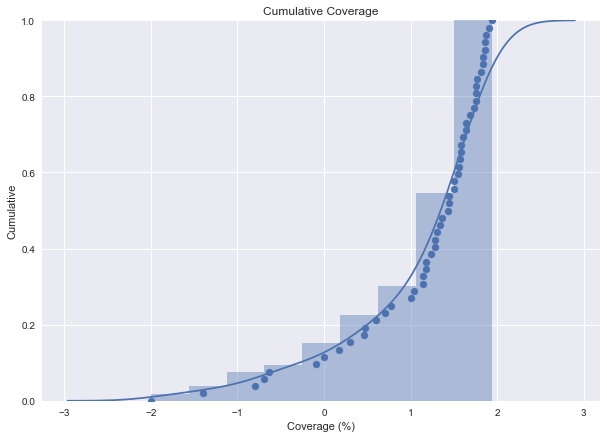

In [84]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
x = np.log10(data[~np.isnan(data.coverage)].coverage)
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.scatter(x2, y)
plt.xlabel("Coverage (%)"); plt.ylabel("Cumulative")
plt.title("Cumulative Coverage")
plt.show()

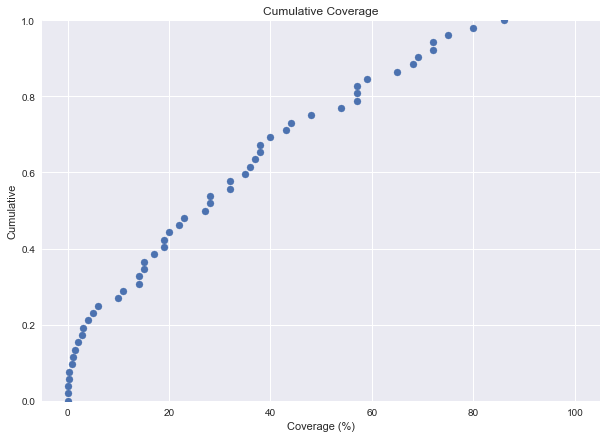

In [43]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
plt.xlim([-5,105])
x = (data[~np.isnan(data.coverage)].coverage)
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]
plt.scatter(x2, y)
plt.xlabel("Coverage (%)"); plt.ylabel("Cumulative")
plt.title("Cumulative Coverage")
plt.show()

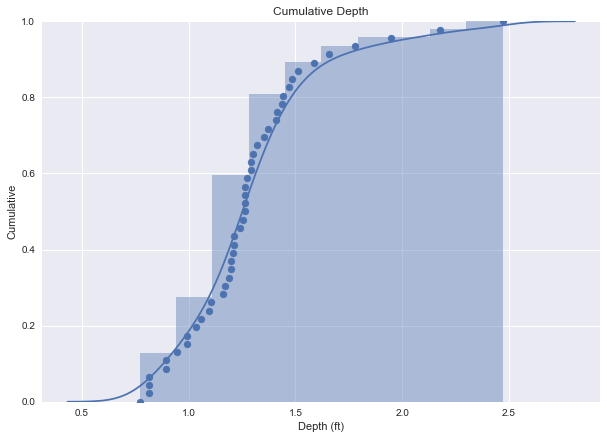

In [21]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
x = np.log10(data[~np.isnan(data.depth_ft)].depth_ft)
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]
sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.scatter(x2, y)
plt.xlabel("Depth (ft)"); plt.ylabel("Cumulative")
plt.title("Cumulative Depth")
plt.show()

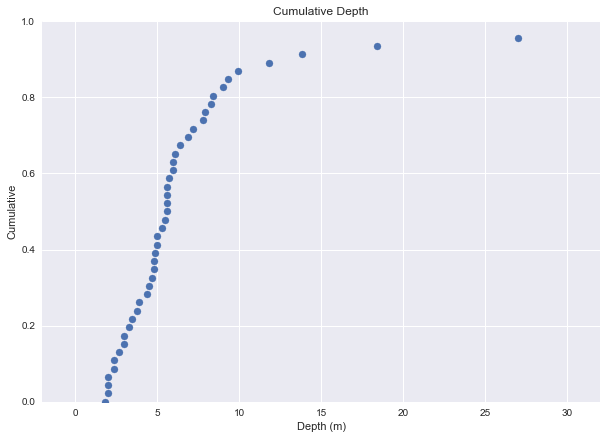

In [27]:
f, ax = plt.subplots(figsize=(10, 7))
plt.ylim([0,1])
plt.xlim([-2,32])
x = (data[~np.isnan(data.depth_ft)].depth_ft)*0.3048
x2 = np.sort(x)
y = (np.linspace(0,x.shape[0],x.shape[0])) / x.shape[0]

plt.scatter(x2, y)
plt.xlabel("Depth (m)"); plt.ylabel("Cumulative")
plt.title("Cumulative Depth")
plt.show()